### While loop  

    while condition :
        expression  으로 구성되어있다. (if statement 와 비슷함) 
        

만약 error 가 업데이트 되지 않아서 조건(condition) 이 계속 True가 되는경우 while loop가 영원히 반복된다.  
이런경우가 생기면 control + C 키를 눌러 당장 벗어나도록 하자.
 


#### for loop

    for var in seq : 
        expression 으로 구성되어 있다.
       

- Numpy array (use a function)  
    for val in np.nditer (my_array): 를 사용한다.

In [22]:
fam = [1.73, 1.68, 1.71, 1.89]
for height in fam :
    print (height)

1.73
1.68
1.71
1.89


In [23]:
# 리스트에 index를 추가 하고자 할때는 enumerate()를 사용한다
# enumerate (열거한다) 는 뜻을 가지고 있다. 
fam = [1.73, 1.68, 1.71, 1.89]
for index , height in enumerate (fam) :
    print ("index " + str(index)+ ": " + str(height))

index 0: 1.73
index 1: 1.68
index 2: 1.71
index 3: 1.89


        
- Dictionary (require a method )  
    for key , val in my_dict.items() : 를 사용  
    

In [24]:
world = { "afghanistan":30.55, 
          "albania":2.77,
          "algeria":39.21 }
for key, value in world.items() :
    print(key + " -- " + str(value))


afghanistan -- 30.55
albania -- 2.77
algeria -- 39.21


#### (1) pd.DataFrame.iterrows() : 행에 대해 순환 반복
    (Iterate over DataFrame rows as (index, Series) pairs.)
#### (2) pd.DataFrame.iteritems() : 열에 대해 순환 반복
    (Iterate over DataFrame (column name, Series) pairs.)
#### (3) pd.DataFrame.itertuples() : 이름이 있는 튜플 (인덱스, 행, 열) 에 대해 순환 반복
    (Iterate over DataFrame rows as namedtuples)

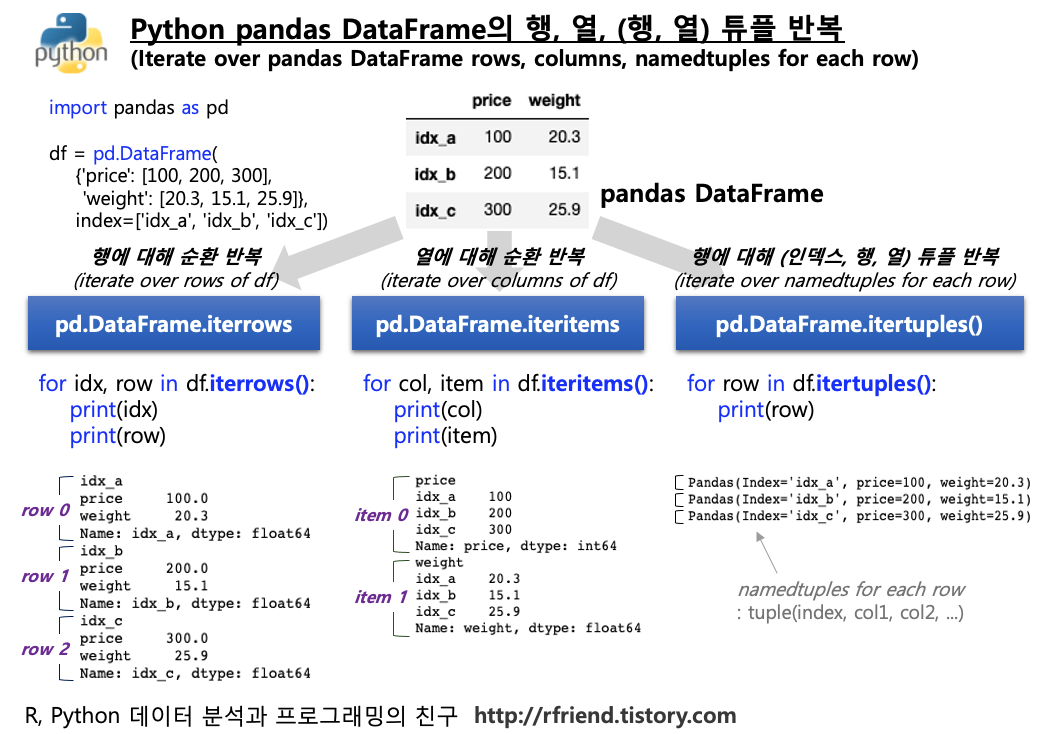

#### (1) pd.DataFrame.iterrows() : 행에 대해 순환 반복
    (Iterate over DataFrame rows as (index, Series) pairs.)  
    
    DataFrame.iterrows()는 index,series의 짝 (pairs)를 반환한다. 
    그렇기에 원본 dataframe에서의 데이터 유형을 보존하지 못함으로 행별 series 에서는 데이터 유형이 달라질수 있다.
    
#### 자료의 양이 많고 반복이 많은 경우에는 반복함수가 아닌 apply ()를 사용하는것이 훨씬 효율적이며  
#### 나아가 판다스 시리즈를 사용한 벡터화나 넘파이 배열을 사용하여 벡터화 하는것이 훨씬 더 효율적인 대안이다.

- 아직 벡터화가 뭔지 모르기때문에 추후에 더 공부해보도록 하자!  




-벡터화 : 함수 수행의 반복량 줄이는 방법을 이해하기 위해 판다스의 기본 단위, 데이터 프레임과 시리즈가 모두 배열 기반임을 알아두자.  
기본 단위의 내부 구조는 개별 값(스칼라라고 함)마다 순차적으로 작동하는 대신 전체 배열 위로 작동하도록 설계된 내장 판다스 함수를 위해 변환된다.  
벡터화는 전체 배열 위로 작업을 실행하는 프로세스다.

판다스는 수학 연산에서 집계 및 문자열 함수(사용 가능한 함수의 광범위한 목록은 판다스 문서에서 확인해라)에 이르기까지 다양한 벡터화 함수를 포함하고 있다.  
내장 함수는 판다스 시리즈와 데이터 프레임에서 작동하게끔 최적화되어있다.  
결과적으로 벡터화 판다스 함수를 사용하는 건 비슷한 목적을 위해 손수 반복시키는 방법보다 거의 항상 바람직하다.  


- 참고: 판다스코드 속도 최적화를 위한 초보자 안내서  
    https://aldente0630.github.io/data-science/2018/08/05/a-beginners-guide-to-optimizing-pandas-code-for-speed.html

In [3]:
import pandas as pd 

In [19]:
df = pd.DataFrame(
    {'height': [160, 170, 180],
     'weight': [65.5, 75.5 , 85.5]},
    index=['small', 'medium', 'large'])
df

,height,weight
small,160,65.5
medium,170,75.5
large,180,85.5


In [27]:
for idx, row in df.iterrows():
    print("** index name:", idx)
    print(row)
    print("-----"*5)

** index name: small
height    160.0
weight     65.5
Name: small, dtype: float64
-------------------------
** index name: medium
height    170.0
weight     75.5
Name: medium, dtype: float64
-------------------------
** index name: large
height    180.0
weight     85.5
Name: large, dtype: float64
-------------------------


예시의 DataFrame 에서 height 칼럼은 int64 (integer정수형) 인데  
df.iterrows()로 반환된 row ['height'] 는 float64(부동소수형)가 된것을 볼수 있다.

In [21]:
print('Data type of df height :', df['height'].dtype) # int
print('Data type of row height :', row['height'].dtype) # float

Data type of df height : int64
Data type of row height : float64


#### (2) pd.DataFrame.iteritems() : 열에 대해 순환 반복
    (Iterate over DataFrame (column name, Series) pairs.)
    

In [25]:
df = pd.DataFrame(
    {'height': [160, 170, 180],
     'weight': [65.5, 75.5 , 85.5]},
    index=['small', 'medium', 'large'])
df

,height,weight
small,160,65.5
medium,170,75.5
large,180,85.5


In [26]:
for col, item in df.iteritems():
    print("** column name:", col)
    print(item)
    print("-----"*5)


** column name: height
small     160
medium    170
large     180
Name: height, dtype: int64
-------------------------
** column name: weight
small     65.5
medium    75.5
large     85.5
Name: weight, dtype: float64
-------------------------


#### (3) pd.DataFrame.itertuples() : 이름이 있는 튜플 (인덱스, 행, 열) 에 대해 순환 반복
    (Iterate over DataFrame rows as namedtuples)
    
     각 행과 열에 대해서 순환반복 하면서 값을 가져오고 이를 묶어주기 때문에 간편하다.
       

In [28]:
df = pd.DataFrame(
    {'height': [160, 170, 180],
     'weight': [65.5, 75.5 , 85.5]},
    index=['small', 'medium', 'large'])
df

,height,weight
small,160,65.5
medium,170,75.5
large,180,85.5


In [29]:
for row in df.itertuples():
    print(row)

Pandas(Index='small', height=160, weight=65.5)
Pandas(Index='medium', height=170, weight=75.5)
Pandas(Index='large', height=180, weight=85.5)


In [33]:
# index를 포함하고 싶지 않은경우 
# index = False 로 설정해주면 된다

for row in df.itertuples(index=False):
    print(row)

Pandas(height=160, weight=65.5)
Pandas(height=170, weight=75.5)
Pandas(height=180, weight=85.5)


In [34]:
# Pandas대신 튜플에 다른 이름을 부여하고 싶을때
# name 매개변수로 튜플 이름을 부여할수 있다
# 아래 예시는 name = 'BMI' 로 변경한예시
for row in df.itertuples(name='BMI'):
    print(row)

BMI(Index='small', height=160, weight=65.5)
BMI(Index='medium', height=170, weight=75.5)
BMI(Index='large', height=180, weight=85.5)


In [32]:
for row in df.itertuples(name='BMI', index = False ):
    print(row)

BMI(height=160, weight=65.5)
BMI(height=170, weight=75.5)
BMI(height=180, weight=85.5)


이번에 정말 많이 참고한 자료  
https://rfriend.tistory.com/601  

Loop  
https://www.w3schools.com/python/python_while_loops.asp  


pandas 사이트의 상단 자료 링크  

- pandas.DataFrame.iteritems  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iteritems.html  

- pandas.DataFrame.iterrows  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iterrows.html#pandas-dataframe-iterrows  

- pandas.DataFrame.itertuples  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.itertuples.html